In [108]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

Investing in financial markets is a multifaceted endeavor influenced by a myriad of factors ranging from macroeconomic trends to micro-level market dynamics. For new investors, the challenge lies not only in understanding the intricacies of these factors but also in determining the most appropriate strategy to navigate them effectively. This project seeks to address this challenge by exploring various investment strategies and leveraging machine learning techniques to identify the optimal approach under different market conditions.

The first aspect of this project involves delving into the nuances of different investment strategies. Dollar Cost Averaging (DCA), for instance, entails investing a fixed amount of money at regular intervals regardless of market fluctuations. On the other hand, Lump Sum investing involves deploying a significant amount of capital into the market at once. Additionally, timing lump sum investments through moving average analysis, dollar-cost averaging proportionate to market overextension, and identifying crossover points between moving averages represent alternative strategies that cater to specific market conditions and investor preferences.

Next, we aim to construct a comprehensive dataset comprising historical market data, including price movements, volatility indices, moving average trends, and other relevant features. This dataset will serve as the foundation for training our machine learning models. By incorporating a diverse range of features, we aim to capture the complex interplay between various market factors and investment outcomes, enabling our models to make informed predictions.

The core of our approach lies in formulating the investment strategy recommendation problem as a classification regression task using contextual multiarmed bandits with epsilon decay. In this setup, each data point represents a specific set of market conditions, and the corresponding label indicates the optimal investment strategy under those conditions. The bandit is comprised of a logistic regression that is continuously fit to data as rounds progress. The power of using a contextual bandit lies in the "arm pulling", which is, the balance of exploring versus exploiting certain strategies to try to get the best reward.By training our machine learning models on this labeled dataset, we aim to develop a predictive model capable of generalizing across different market scenarios and providing actionable recommendations to new investors.

In summary, this project aims to bridge the gap between theory and practice in investment decision-making by leveraging the power of machine learning. By systematically exploring different investment strategies and developing predictive models tailored to prevailing market conditions, we aim to empower new investors with the knowledge and tools necessary to navigate financial markets confidently and achieve their investment goals.


## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Jason:

This project is particularly meaningful for me as a beginner investor seeking to navigate the complexities of the financial markets. By delving into the application of machine learning techniques, I aim to gain practical insights into understanding current market conditions and optimizing my investment strategy accordingly. This hands-on experience provides a valuable opportunity for me to learn how to interpret market data effectively and make informed decisions.

Costanza:

Although my interests are not as based in finance as Jason, I have been interested in applying my knowledge of decision models to more real-world applications for a while. I think it's important for me to start thinking about realistic investments for when I start (hopefully) receiving a more consisten salary post-grad. 

Jason and Costanza:

Moreover, this endeavor isn't just about personal growth; it directly addresses the needs of beginner investors like ourselves who are seeking guidance in understanding the intricacies of the market. By utilizing machine learning to analyze historical market data, this project offers a practical framework for evaluating investment opportunities and managing risks. Through this process, we hope to develop a more nuanced understanding of investment strategies that will serve us well as we continue to navigate the financial landscape.

In essence, this project is about empowering beginner investors to make smarter decisions by leveraging data-driven insights. It's a practical journey that not only enhances our own understanding but also has the potential to benefit others who are embarking on their investment journey.

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



YOUR ANSWER HERE

Step 1: Strategy Development and Testing

Step 2: Machine Learning Classifier

The next component of our project is to find a selection algorithm that decides between the strategies described above to maximize portfolios returns. Our $y$ variable for this portion of the project was whether or not the selected strategy was in fact the best strategy, so we are predicting which strategy will be most useful in a given scenario given market conditions for a given ticker.

Contextual bandits work by balancing the concepts of exploitation and exploration. Exploitation means that the bandit simply selects the strategy that is most likely to perform best. In our case, this is done by iterativey training logistic regressions for each arm and using the result as a probability. Thus, in theory, the maximum probability returned across the strategies is the strategy most likely to return as the best strategy for the given scenario. Exploration is done to avoid falling into local minima from the exploitation. This contextual bandit does this in two ways. The first is a standard practice among bandits, where the first few rounds, the bandit will "pull" each arm (in our case, each strategy) once to explore what the possibilities look like. 

Our contextual bandit also uses a decaying epsilon strategy to use some level of randomness to explore other arms. The epsilon value sets a certain limit to how much we'd like to explore versus exploit. Each orund, a random draw is taken and, if the number is lower than the epsilon value, the bandit will randomly pull an arm instead of exploring the arm that returns the highest probability. 

Our bandit also implements epsilon decay, which makes the epsilon value smaller and smaller as the bandit is trained. So, in theory, the bandit will grow more confident about which arm will give the best reward, so it is less necessary to explore other strategies. The values selected below were chosen as they are relatively standard values that worked for our implementation.

Each logistic regression in the bandit is trained on the time since the training/testing start date, clossing value, moving average, volatility, and momentum. Data is fed into the bandit in batches of 50, as that seemed to work well for us and any lower or higher made strategy calculations difficult and yielded unsubstantial or interpretable results. Note that fits are made on everything but the last datapoint of the batch, and the outcomes are recorded using that last datapoint to avoid data leakage. 

Testing simply exploits the bandit's fitted logistic regressions without updating them to return the bandit's decisions and successes (calculated post-hoc). 

In [109]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah


#!pip install yahoo_fin

import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
import warnings
from sklearn.linear_model import LogisticRegression
import random
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

YOUR ANSWER HERE

In [110]:
#PAST DJIA
custom_tickers = [
    "^DJI",    # Dow Jones Industrial Average (DJI)
    "^GSPC",   # S&P 500
    "^IXIC",   # NASDAQ Composite
    "^FTSE",   # FTSE 100
    "^RUT",   # RUT
    #"^N225",
    #"^RMCC",
    #"^MID"
]


# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")
        
sandp_time = stock_data["^GSPC"]

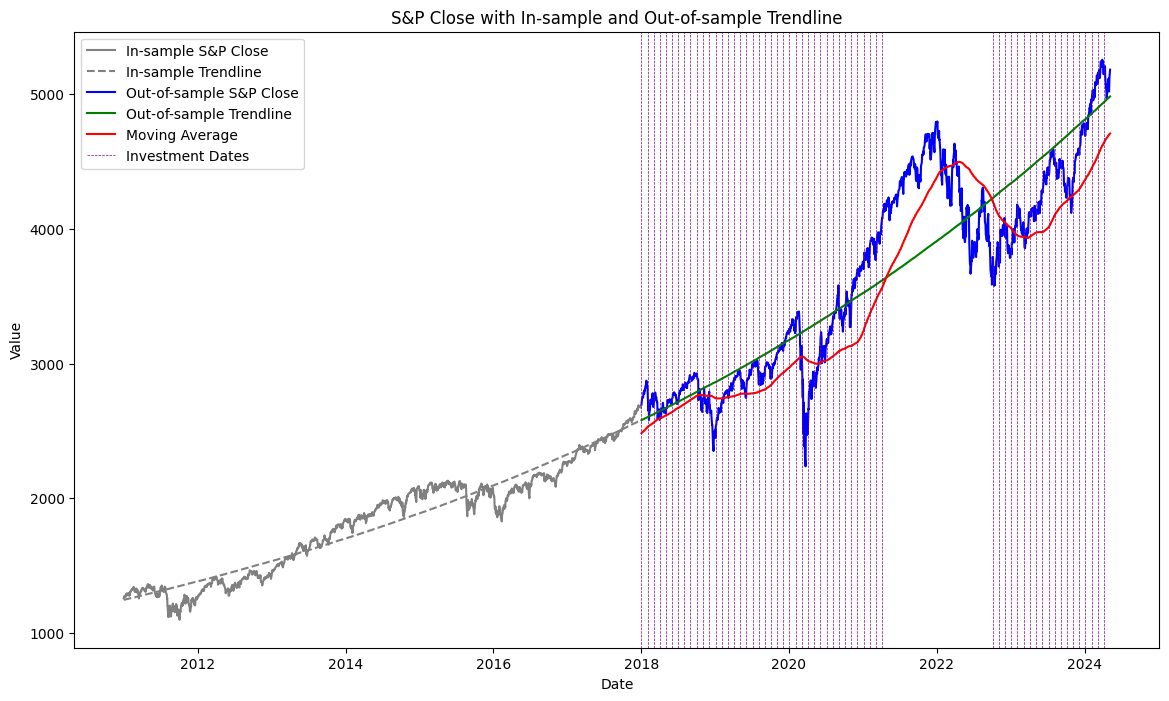

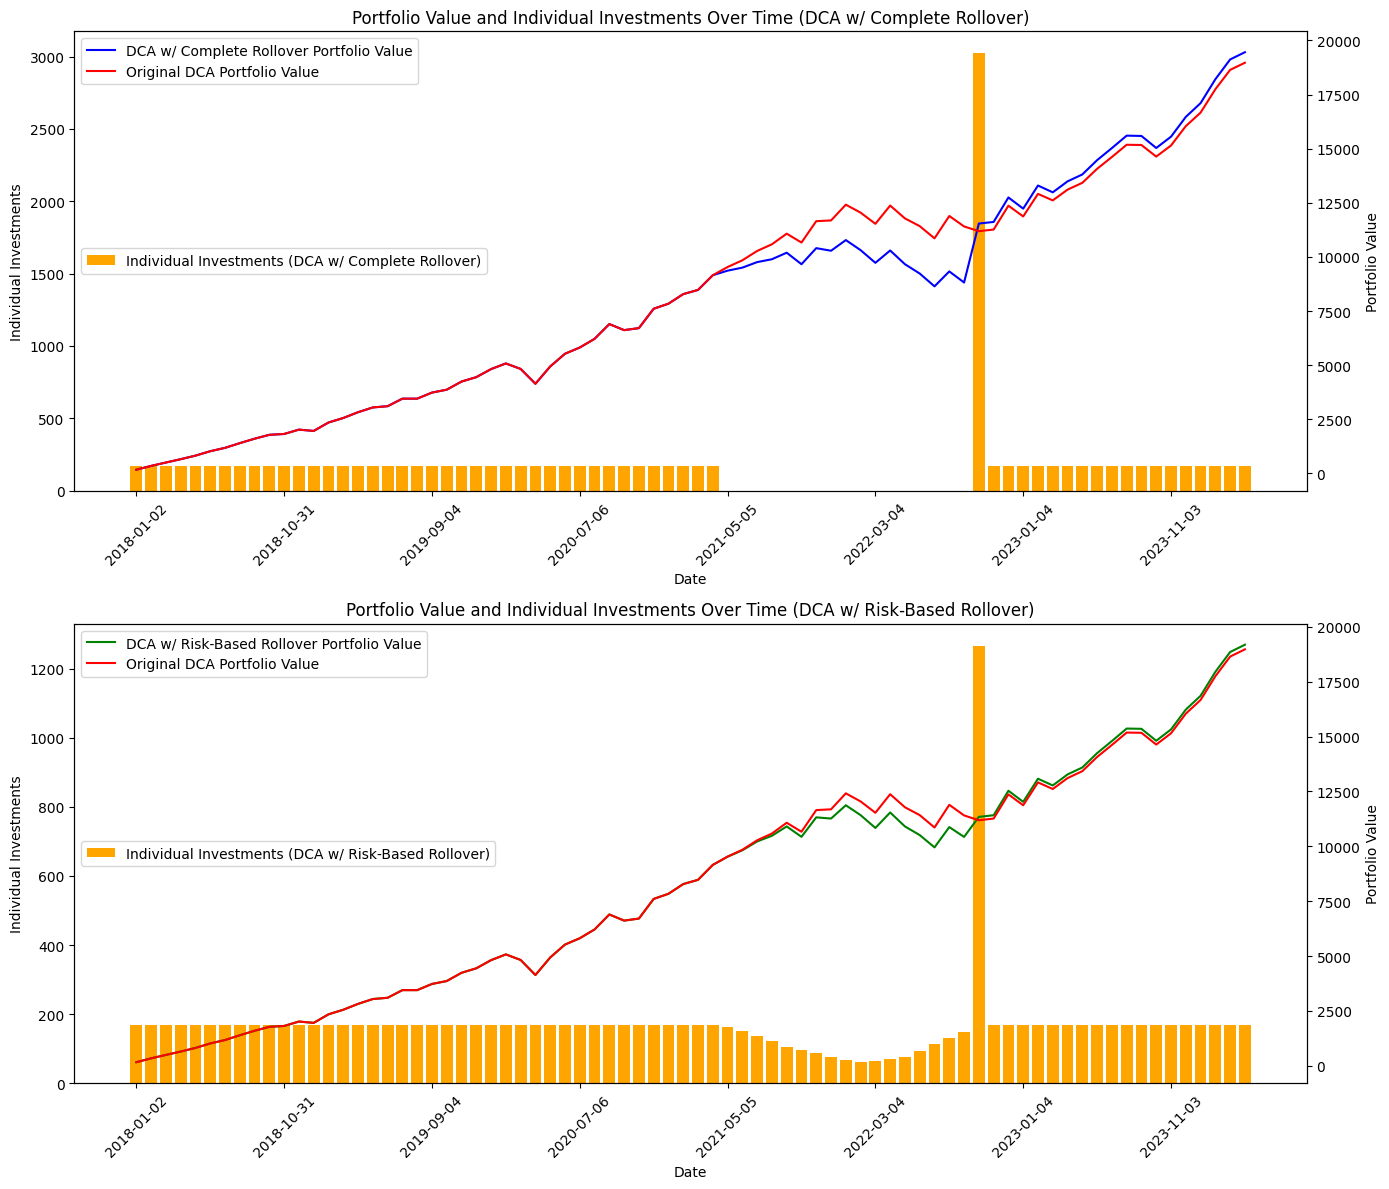

Moving Average DCA Value:  19457.578467509473
Complex Moving Average DCA Value:  19182.41827012572
Original DCA Value:  18971.636782828864
Percent (MA/Original):  102.56141149149785
Percent (Complex MA/Original):  101.11103480268837


In [111]:
def dca_analysis(sandp_time, trendline_multiplier, moving_average_window, time_interval, training_start_date, training_end_date, testing_start_date, testing_end_date, max_val, show_graph):
    sandp_time.index = pd.to_datetime(sandp_time.index)
    
    def dca_with_complete_rollover_strategy(df, investment_amount, interval, moving_averages_df, trendline_multiplier):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        aggregated_investment = 0

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            ma_value = moving_averages_df['Moving Average'][i]
            trendline_value = df['Trendline'][i]
    
            invested_period = investment_amount + aggregated_investment
            
            if ma_value * trendline_multiplier < trendline_value or i >= (len(df) - interval - 2):
                shares_bought = invested_period / current_price
                shares_owned += shares_bought
                
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                
                investment_history.append(invested_period)
                aggregated_investment = 0 
            else:
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(0)

                aggregated_investment += investment_amount

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)
    
    def dca_with_risk_based_rollover_strategy(df, initial_investment, interval, moving_averages_df, trendline_multiplier):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        remaining_investment = 0

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            ma_value = moving_averages_df['Moving Average'][i]
            trendline_value = df['Trendline'][i]

            if ma_value * trendline_multiplier < trendline_value or i >= (len(df) - interval - 2):
                total_investment = remaining_investment + initial_investment
                shares_bought = total_investment / current_price
                
                shares_owned += shares_bought
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(total_investment)
                remaining_investment = 0
            else:
                distance_percentage = (ma_value - trendline_value) / trendline_value
                adjustment_factor = max(1 - distance_percentage * max_val/2, 0)
            
                amount_to_invest = initial_investment * adjustment_factor
                shares_bought = amount_to_invest / current_price
                shares_owned += shares_bought

                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(amount_to_invest)
                remaining_investment += initial_investment - amount_to_invest

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)
    
    def original_dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)
    
    # Split the dataset into in-sample (training) and out-of-sample (testing)
    training_df = sandp_time[training_start_date:training_end_date]
    testing_df = sandp_time[testing_start_date:testing_end_date]

    # Fit the curve on the training dataset
    def exponential_func(x, a, b):
        return a * np.exp(b * x)
    
    x_values_train = np.arange(len(training_df))
    y_values_train = training_df['close']
    initial_guess = (1.0, 0.001)
    popt, pcov = curve_fit(exponential_func, x_values_train, y_values_train, p0=initial_guess)
    trendline_train = exponential_func(x_values_train, *popt)

    # Apply the trendline to the testing dataset
    x_values_test = np.arange(len(testing_df)) + len(training_df)
    trendline_test = exponential_func(x_values_test, *popt)
    testing_df['Trendline'] = trendline_test

    # Calculate moving averages for the testing dataset
    moving_averages_test = pd.DataFrame()
    full_set = sandp_time[training_start_date:testing_end_date]
    moving_averages_test['Moving Average'] = full_set['close'].rolling(window=moving_average_window).mean()[len(full_set)-len(testing_df):]

    # Calculate the investment strategy results on the testing dataset
    custom_result = dca_with_complete_rollover_strategy(testing_df, 8 * time_interval, time_interval, moving_averages_test, trendline_multiplier)
    original_result = original_dca_strategy(testing_df, 8 * time_interval, time_interval)
    second_custom_result = dca_with_risk_based_rollover_strategy(testing_df, 8 * time_interval, time_interval, moving_averages_test, trendline_multiplier)

    
    
    # Plotting
    if show_graph:
        plt.figure(figsize=(14, 8))
        # Plot in-sample data
        plt.plot(training_df.index, training_df['close'], label='In-sample S&P Close', color='gray')
        plt.plot(training_df.index, trendline_train, label='In-sample Trendline', color='gray', linestyle='--')
        # Plot out-of-sample data
        plt.plot(testing_df.index, testing_df['close'], label='Out-of-sample S&P Close', color='blue')
        plt.plot(testing_df.index, testing_df['Trendline'], label='Out-of-sample Trendline', color='green')
        plt.plot(testing_df.index, moving_averages_test['Moving Average'], label='Moving Average', color='red')

        for date in custom_result.index[custom_result['investment_history'] > 0]:
            plt.axvline(x=date, color='purple', linestyle='--', linewidth=0.5, label='Investment Dates' if 'Investment Dates' not in plt.gca().get_legend_handles_labels()[1] else "")

        plt.title('S&P Close with In-sample and Out-of-sample Trendline')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


        # Plotting the bar plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

        # Plotting the bar plots
        ax1.bar(custom_result.index.strftime('%Y-%m-%d'), custom_result['investment_history'], color='orange', label='Individual Investments (DCA w/ Complete Rollover)')
        ax2.bar(second_custom_result.index.strftime('%Y-%m-%d'), second_custom_result['investment_history'], color='orange', label='Individual Investments (DCA w/ Risk-Based Rollover)')

        # Creating a second y-axis for ax1
        ax1_twin = ax1.twinx()
        ax1_twin.set_ylabel('Portfolio Value')

        # Creating a second y-axis for ax2
        ax2_twin = ax2.twinx()
        ax2_twin.set_ylabel('Portfolio Value')

        # Plotting the line plots on the second y-axis
        ax1_twin.plot(custom_result.index.strftime('%Y-%m-%d'), custom_result['portfolio_value'], label='DCA w/ Complete Rollover Portfolio Value', color='blue')
        ax1_twin.plot(original_result.index.strftime('%Y-%m-%d'), original_result['portfolio_value'], label='Original DCA Portfolio Value', color='red')

        ax2_twin.plot(second_custom_result.index.strftime('%Y-%m-%d'), second_custom_result['portfolio_value'], label='DCA w/ Risk-Based Rollover Portfolio Value', color='green')
        ax2_twin.plot(original_result.index.strftime('%Y-%m-%d'), original_result['portfolio_value'], label='Original DCA Portfolio Value', color='red')

        # Adding labels and legend for ax1
        ax1.set_title('Portfolio Value and Individual Investments Over Time (DCA w/ Complete Rollover)')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Individual Investments')
        ax1.xaxis.set_tick_params(rotation=45)
        ax1.legend(loc='center left')
        ax1_twin.legend(loc='upper left')
        tick_frequency = 10
        ax1.xaxis.set_ticks(original_result.index.strftime('%Y-%m-%d')[::tick_frequency])

        # Adding labels and legend for ax2
        ax2.set_title('Portfolio Value and Individual Investments Over Time (DCA w/ Risk-Based Rollover)')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Individual Investments')
        ax2.xaxis.set_tick_params(rotation=45)
        ax2.legend(loc='center left')
        ax2_twin.legend(loc='upper left')
        tick_frequency = 10
        ax2.xaxis.set_ticks(original_result.index.strftime('%Y-%m-%d')[::tick_frequency])

        plt.tight_layout()
        plt.show()
        
        print("Moving Average DCA Value: ", custom_result["portfolio_value"][-1])
        print("Complex Moving Average DCA Value: ", second_custom_result["portfolio_value"][-1])
        print("Original DCA Value: ", original_result["portfolio_value"][-1])
        print("Percent (MA/Original): ", custom_result["portfolio_value"][-1]/original_result["portfolio_value"][-1]*100)
        print("Percent (Complex MA/Original): ", second_custom_result["portfolio_value"][-1]/original_result["portfolio_value"][-1]*100)
        
        return custom_result, second_custom_result, original_result
    
    
        
# Define parameters
moving_average = 200
time_interv = 21
training_start_date = '2010-12-31'
training_end_date = '2017-12-31'
testing_start_date = '2018-01-01'
testing_end_date = '2024-12-01'
max_val = 10

final = dca_analysis(sandp_time, trendline_multiplier=1.0, moving_average_window=moving_average, time_interval=time_interv, training_start_date=training_start_date, training_end_date=training_end_date, testing_start_date=testing_start_date, testing_end_date=testing_end_date, max_val=max_val, show_graph=True)


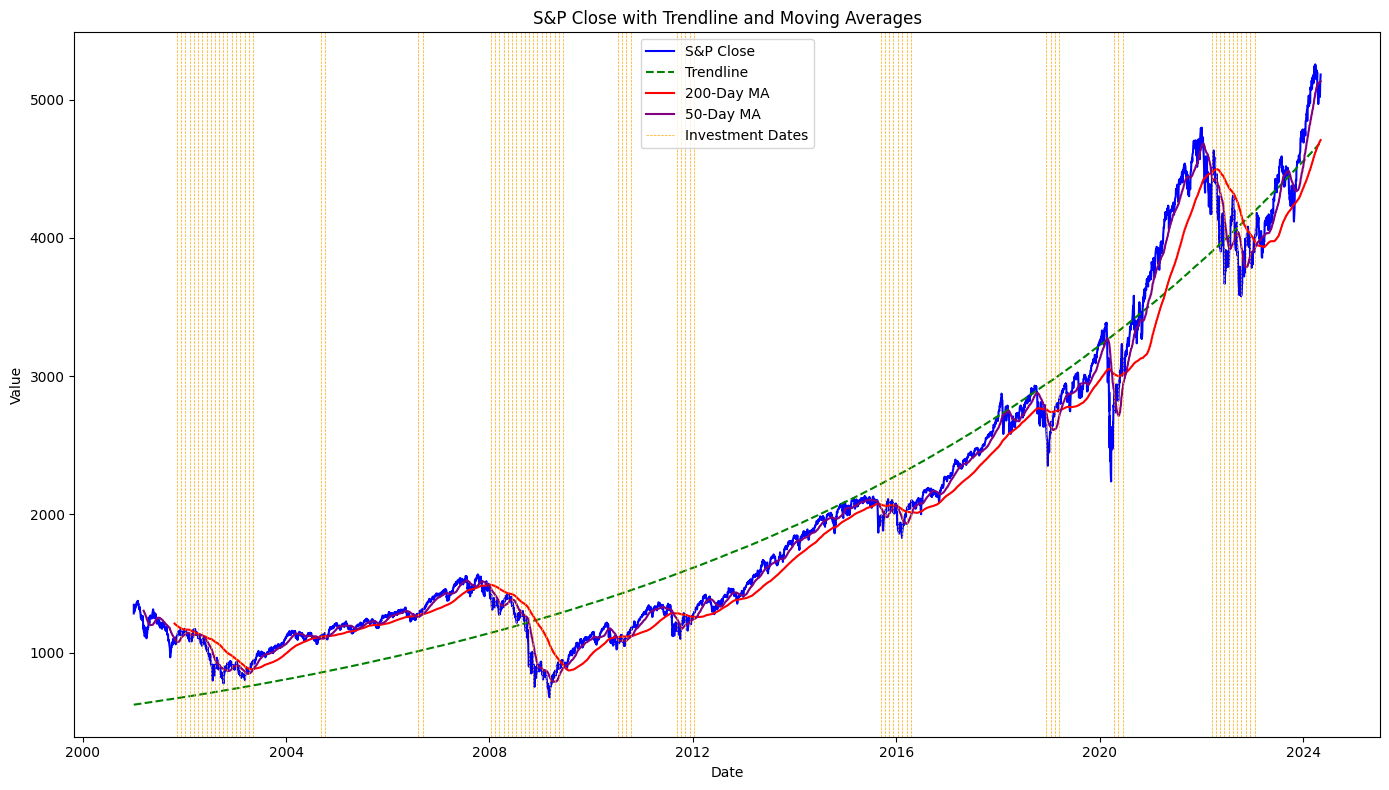

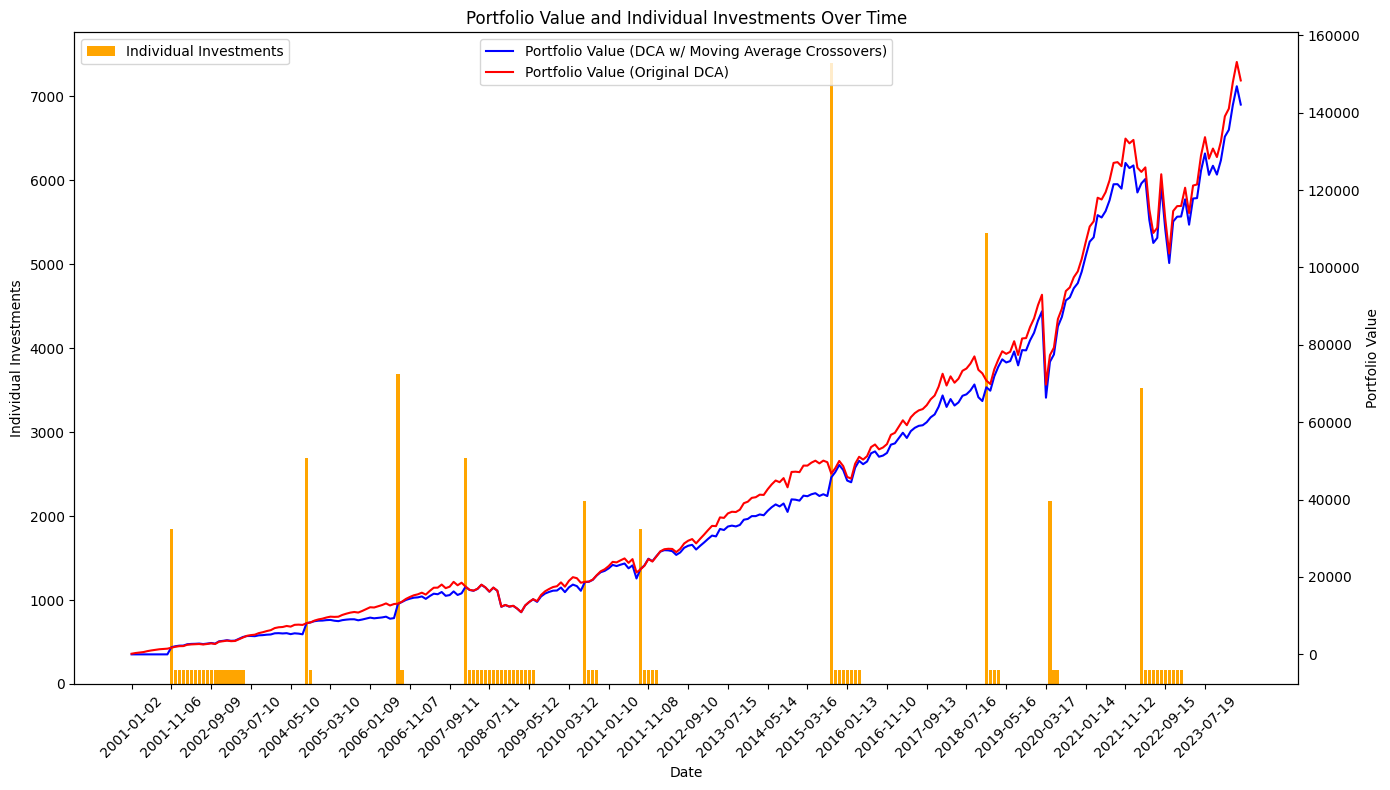

Moving Average DCA Value:  142097.28617345923
Original DCA Value:  148334.60537625244
Percent (MA/Original):  95.79510176538227


In [112]:
def dca_analysis(sandp_time, time_interval, start_date, end_date, show_graph, moving_average_windows):
    # Ensure datetime index
    sandp_time.index = pd.to_datetime(sandp_time.index)
    
    # Calculate moving averages for any set of windows
    def calculate_moving_averages(df, window_sizes):
        moving_averages = {}
        for window in window_sizes:
            ma = df['close'].rolling(window=window).mean()
            moving_averages[f'{window}-Day MA'] = ma
        return pd.DataFrame(moving_averages)
    
    #NO SELLING AND BUYING
    # Strategy comparing two moving averages
    def two_moving_average_strategy(df, investment_amount, interval, moving_averages_df, moving_average_windows):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        aggregated_investment = 0

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            ma_short = moving_averages_df[f'{moving_average_windows[0]}-Day MA'][i]
            ma_long = moving_averages_df[f'{moving_average_windows[1]}-Day MA'][i]

            if ma_short > ma_long:
                invested_period = investment_amount + aggregated_investment
                shares_bought = invested_period / current_price
                shares_owned += shares_bought
                
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(invested_period)
                aggregated_investment = 0
            else:
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(0)
                aggregated_investment += investment_amount

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    #INCORPORATING SELLING AND BUYING
#     def two_moving_average_strategy(df, investment_amount, interval, moving_averages_df, moving_average_windows):
#         shares_owned = 0
#         cash_held = 0
#         in_position = False
#         portfolio_value = []
#         dates = []
#         investment_history = []
#         aggregated_investment = 0

#         for i in range(0, len(df), interval):
#             current_price = df.iloc[i]['close']
#             ma_short = moving_averages_df[f'{moving_average_windows[0]}-Day MA'][i]
#             ma_long = moving_averages_df[f'{moving_average_windows[1]}-Day MA'][i]

#             if ma_short > ma_long:
#                 if not in_position:
#                     # Buy back using all available cash if previously sold everything
#                     if cash_held > 0:
#                         shares_bought = cash_held / current_price
#                         shares_owned += shares_bought
#                         cash_held = 0
#                     in_position = True

#                 # DCA investment since we're in a "buy" state
#                 invested_amount = investment_amount + aggregated_investment
#                 shares_bought = invested_amount / current_price
#                 shares_owned += shares_bought
#                 aggregated_investment = 0
#                 investment_history.append(invested_amount)
#             else:
#                 if in_position:
#                     # Sell all shares if previously holding them
#                     cash_held = shares_owned * current_price
#                     shares_owned = 0
#                     in_position = False

#                 # Aggregate cash if out of position and not a sell action
#                 aggregated_investment += investment_amount
#                 investment_history.append(0)  # Append 0 investment for non-buy actions

#             # Update portfolio value whether in cash or stocks
#             current_value = shares_owned * current_price + cash_held
#             portfolio_value.append(current_value)
#             dates.append(df.index[i])

#         return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    
    # Define the original DCA strategy
    def original_dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    # Combine datasets
    combined_df = sandp_time[start_date:end_date]

    # Fit exponential curve to data
    x_values = np.arange(len(combined_df))
    y_values = combined_df['close']
    initial_guess = (1.0, 0.001)
    popt, pcov = curve_fit(lambda x, a, b: a * np.exp(b * x), x_values, y_values, p0=initial_guess)
    trendline = popt[0] * np.exp(popt[1] * x_values)
    combined_df['Trendline'] = trendline

    # Calculate moving averages for the combined dataset including both strategies
    moving_averages_combined = calculate_moving_averages(combined_df, moving_average_windows)

    # Apply two moving average strategy
    two_ma_result = two_moving_average_strategy(combined_df, 8 * time_interval, time_interval, moving_averages_combined, moving_average_windows)
    
    # Apply original DCA strategy
    original_result = original_dca_strategy(combined_df, 8 * time_interval, time_interval)

    # Plotting
    if show_graph:
        # Plotting the first graph
        fig, ax = plt.subplots(figsize=(14, 8))
        ax.plot(combined_df.index, combined_df['close'], label='S&P Close', color='blue')
        ax.plot(combined_df.index, combined_df['Trendline'], label='Trendline', linestyle='--', color='green')
        ax.plot(moving_averages_combined.index, moving_averages_combined[f'{moving_average_windows[0]}-Day MA'], label=f'{moving_average_windows[0]}-Day MA', color='red')
        ax.plot(moving_averages_combined.index, moving_averages_combined[f'{moving_average_windows[1]}-Day MA'], label=f'{moving_average_windows[1]}-Day MA', color='purple')
        
        for date in two_ma_result.index[two_ma_result['investment_history'] > 0]:
            ax.axvline(x=date, color='orange', linestyle='--', linewidth=0.5, label='Investment Dates' if 'Investment Dates' not in ax.get_legend_handles_labels()[1] else "")

        ax.set_title('S&P Close with Trendline and Moving Averages')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Plotting the second graph
        fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))
        ax1.bar(two_ma_result.index.strftime('%Y-%m-%d'), two_ma_result['investment_history'], color='orange', label='Individual Investments')

        ax1_twin = ax1.twinx()
        ax1_twin.plot(two_ma_result.index.strftime('%Y-%m-%d'), two_ma_result['portfolio_value'], label='Portfolio Value (DCA w/ Moving Average Crossovers)', color='blue')
        
        # Plot original DCA strategy
        ax1_twin.plot(original_result.index.strftime('%Y-%m-%d'), original_result['portfolio_value'], label='Portfolio Value (Original DCA)', color='red')
        tick_frequency = 10
        ax1.xaxis.set_ticks(original_result.index.strftime('%Y-%m-%d')[::tick_frequency])
        
        ax1.set_title('Portfolio Value and Individual Investments Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Individual Investments')
        ax1_twin.set_ylabel('Portfolio Value')
        ax1.xaxis.set_tick_params(rotation=45)
        ax1.legend(loc='upper left')
        ax1_twin.legend(loc='upper center')
        plt.tight_layout()
        plt.show()
        
        print("Moving Average DCA Value: ", two_ma_result["portfolio_value"][-1])
        print("Original DCA Value: ", original_result["portfolio_value"][-1])
        print("Percent (MA/Original): ", two_ma_result["portfolio_value"][-1]/original_result["portfolio_value"][-1]*100)

    return two_ma_result, original_result

time_interval = 21
start_date = '2000-12-31'
end_date = '2024-12-01'
show_graph = True
moving_average_windows = [200, 50]

final_result = dca_analysis(sandp_time, time_interval, start_date, end_date, show_graph, moving_average_windows)


In [113]:
def dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, slope_val, days_val):
    sandp_time.index = pd.to_datetime(sandp_time.index)

    def lump_sum_strategy(df, initial_investment, interval, moving_averages_df):
        total_investment = len(range(interval, len(df), interval)) * initial_investment
        initial_price = df['close'].iloc[0]  # First available closing price at testing start
        shares_owned = total_investment / initial_price  # Total shares bought at once
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(0)  # No additional investment made

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)
    
    def lump_sum_with_delay_strategy(df, initial_investment, interval, moving_averages_df):
        initial_in = len(range(interval, len(df), interval)) * initial_investment
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        remaining_investment = 0
        lump_sum_invested = False
        ma_value_peak = moving_averages_df.iloc[0]
        total_investment = 0
        ma_slope = np.gradient(moving_averages_df)

        days = 0
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']

            if not lump_sum_invested:
                if i >= 10000 or ((ma_slope[i] > slope_val) and days >= days_val):
                    shares_bought = initial_in / current_price
                    shares_owned += shares_bought
                    current_value = shares_owned * current_price
                    portfolio_value.append(current_value)
                    dates.append(df.index[i])
                    investment_history.append(total_investment)
                    lump_sum_invested = True
                    days = 0
                else:
                    if (ma_slope[i] > 0):
                        days += 1
                    else:
                        days = 0
                    total_investment = 0
            else:
                total_investment = 0

            shares_bought = total_investment / current_price if total_investment > 0 else 0
            shares_owned += shares_bought
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(total_investment)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    def dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    # Calculate moving averages for the testing dataset
    testing_df = sandp_time[start_date:end_date]
    full_set = sandp_time#[training_start_date:testing_end_date]
    moving_averages_test = full_set['close'].rolling(window=moving_average_window).mean()[start_date:end_date]
    print(moving_averages_test)
    
    # Calculate the investment strategy results on the testing dataset
    lump_sum_result = lump_sum_strategy(testing_df, initial_investment, time_interval, moving_averages_test)
    dca_result = dca_strategy(testing_df, initial_investment, time_interval)
    lump_sum_with_delay_result = lump_sum_with_delay_strategy(testing_df, initial_investment, time_interval, moving_averages_test)
    
    # Plotting
    if show_graph:
        plt.figure(figsize=(14, 8))
        plt.plot(testing_df.index, testing_df['close'], label='S&P Close', color='blue')
        plt.plot(testing_df.index, moving_averages_test, label='Moving Average', color='red')

        for date in lump_sum_with_delay_result.index[lump_sum_with_delay_result['investment_history'] > 0]:
            plt.axvline(x=date, color='purple', linestyle='--', linewidth=0.5, label='Investment Dates' if 'Investment Dates' not in plt.gca().get_legend_handles_labels()[1] else "")

        plt.title('S&P Close and Moving Average Over Time')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        # Plot DCA Strategy Performance
        fig, ax1 = plt.subplots(figsize=(14, 8))

        ax1.bar(lump_sum_with_delay_result.index.strftime('%Y-%m-%d'), lump_sum_with_delay_result['investment_history'], color='orange', label='Individual Investments')

        ax2 = ax1.twinx()

        ax2.plot(lump_sum_with_delay_result.index.strftime('%Y-%m-%d'), lump_sum_with_delay_result['portfolio_value'], label='Lump Sum w/ Delay Portfolio Value', color='blue')
        ax2.plot(dca_result.index.strftime('%Y-%m-%d'), dca_result['portfolio_value'], label='DCA Portfolio Value', color='red')
        ax2.plot(lump_sum_result.index.strftime('%Y-%m-%d'), lump_sum_result['portfolio_value'], label='Lump Sum Portfolio Value', color='black')
        
        ax1.set_title('Portfolio Value and Individual Investments Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Individual Investments')
        ax2.set_ylabel('Portfolio Value')
        ax1.xaxis.set_tick_params(rotation=45)
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper center')
        
        tick_frequency = 10
        ax1.xaxis.set_ticks(lump_sum_with_delay_result.index.strftime('%Y-%m-%d')[::tick_frequency])

        plt.show()

    lump_sum_with_delay_value = lump_sum_with_delay_result["portfolio_value"][-1]
    dca_value = dca_result["portfolio_value"][-1]
    lump_sum_value = lump_sum_result["portfolio_value"][-1]

    return [lump_sum_with_delay_value, dca_value, lump_sum_value]

2008-01-31    1484.611349
2008-02-01    1484.225949
2008-02-04    1483.776399
2008-02-05    1483.037849
2008-02-06    1482.265449
                 ...     
2013-12-24    1673.567400
2013-12-26    1675.004900
2013-12-27    1676.395750
2013-12-30    1677.797600
2013-12-31    1679.278900
Name: close, Length: 1491, dtype: float64


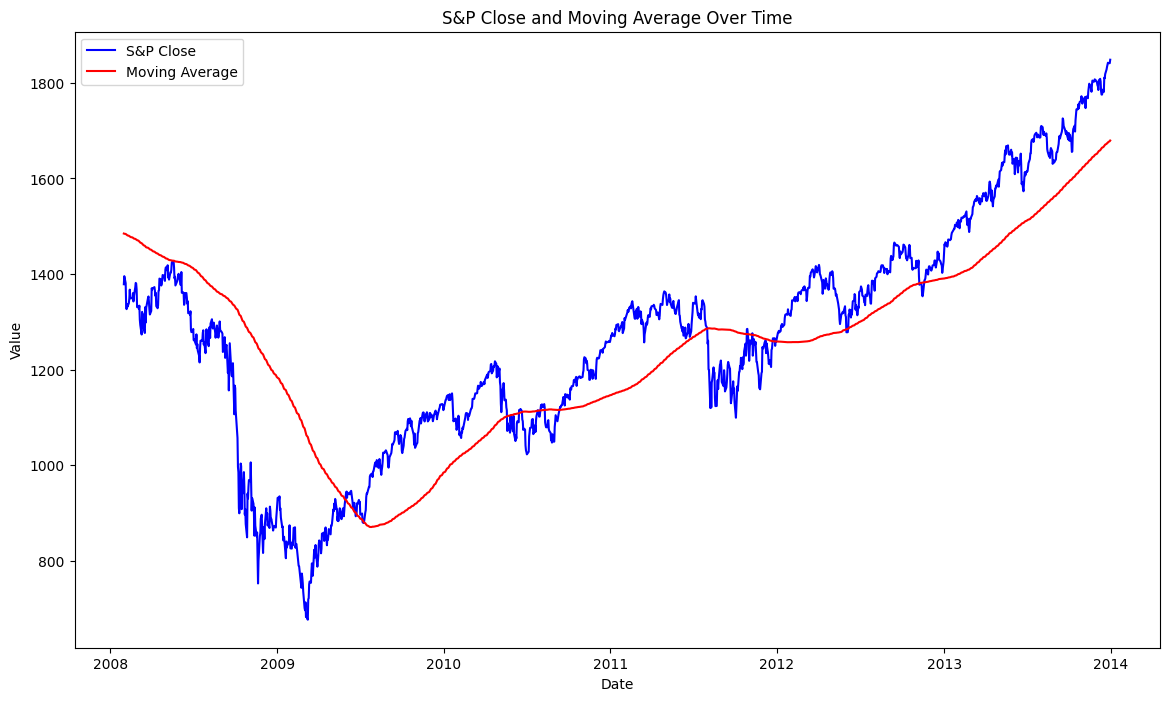

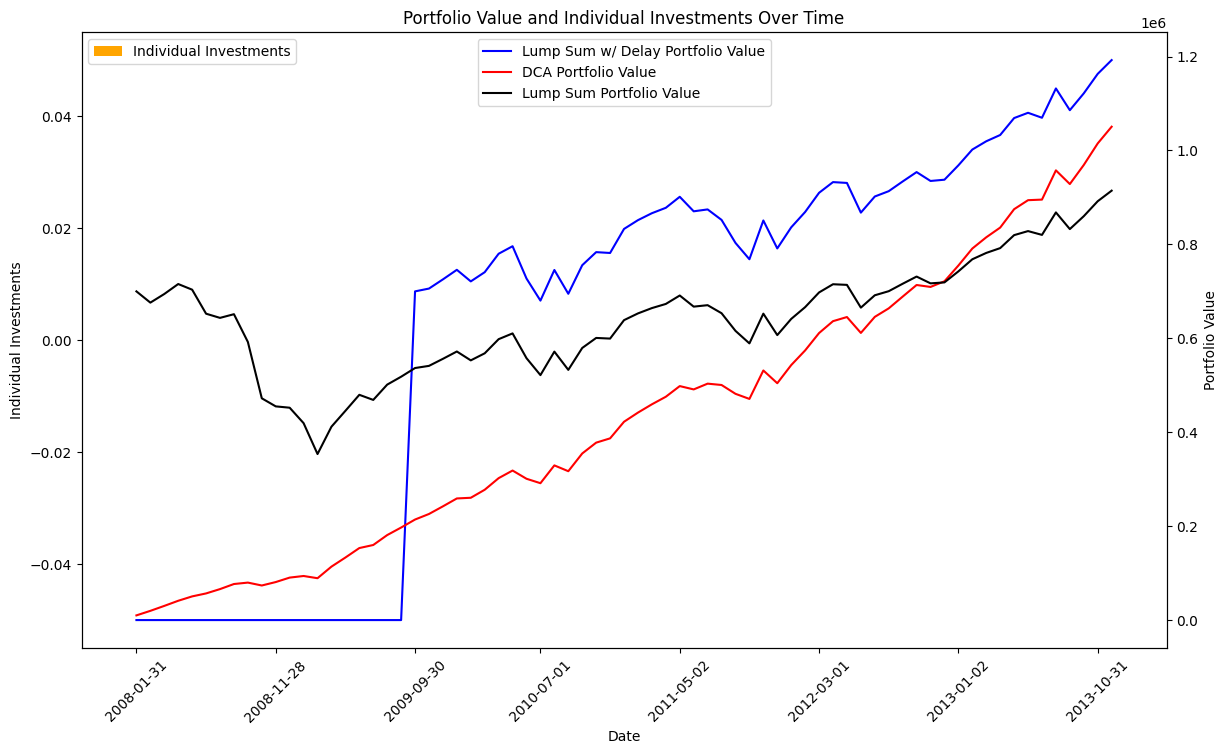

Lump Sum Result:  1192558.812480809
Original DCA Result:  1050666.379341123
Custom DCA Result:  914460.8265485012


In [114]:
#Example where waiting to lump-sum is better
moving_average_window = 200
time_interval = 21
start_date = '2008-01-31'
end_date = '2014-01-01'
initial_investment = 10000
show_graph = True
slope_val = 0.001
days_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, slope_val, days_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

2017-01-03    2137.375145
2017-01-04    2138.470894
2017-01-05    2139.566894
2017-01-06    2140.768244
2017-01-09    2141.933044
                 ...     
2019-12-24    2959.558890
2019-12-26    2961.703840
2019-12-27    2963.861541
2019-12-30    2965.855591
2019-12-31    2967.844791
Name: close, Length: 754, dtype: float64


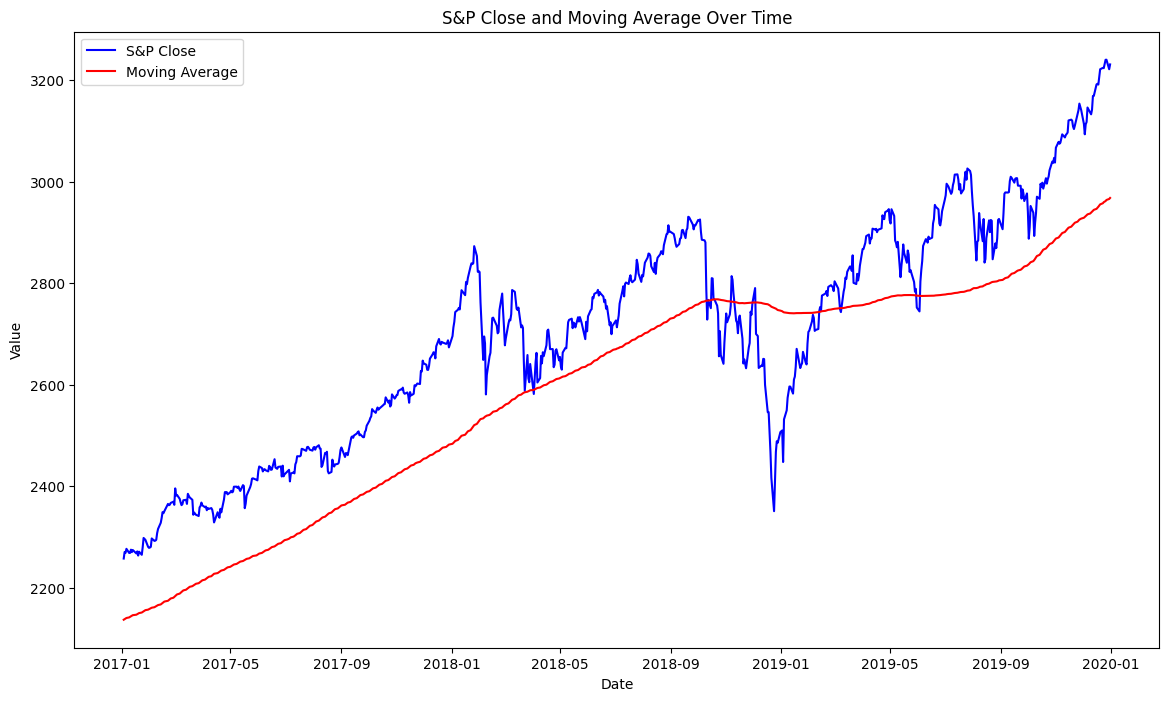

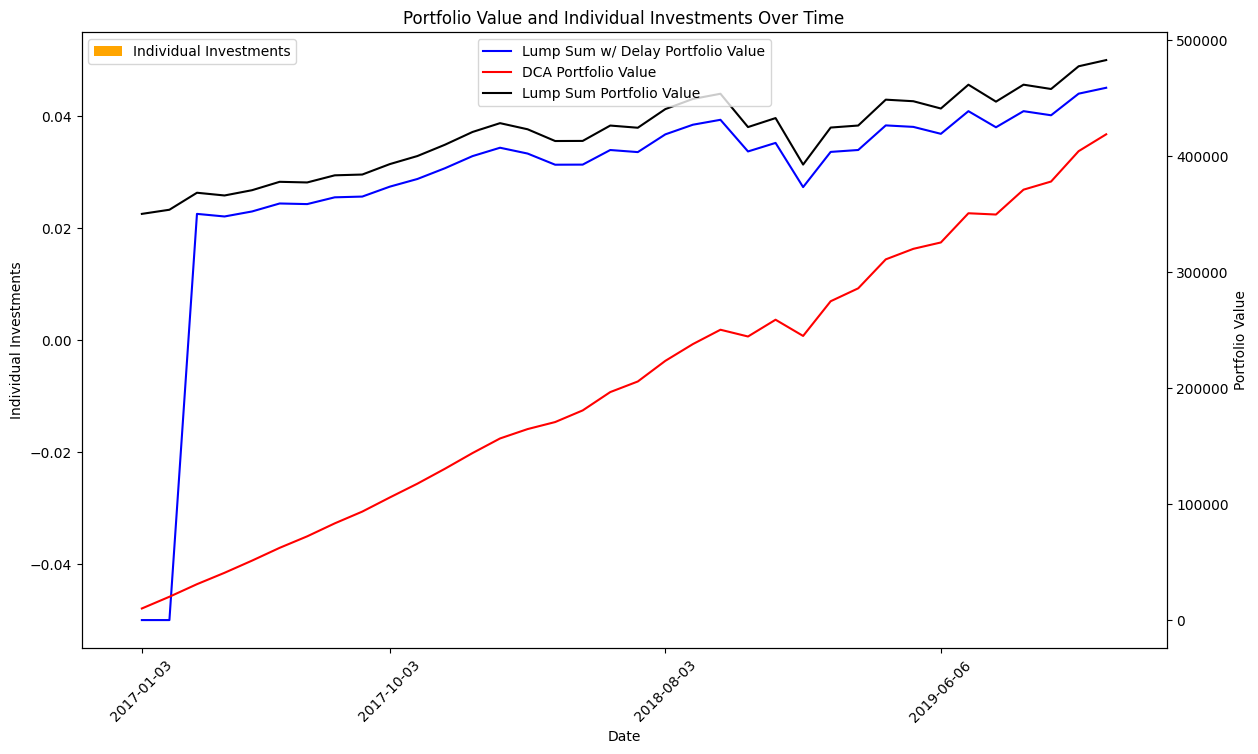

Lump Sum Result:  458662.6488934936
Original DCA Result:  418570.6861200694
Custom DCA Result:  482527.8987879852


In [115]:
#Example where lump-sum at the start is better

moving_average_window = 200
time_interval = 21
start_date = '2016-12-31'
end_date = '2020-01-01'
initial_investment = 10000
show_graph = True
slope_val = 0.001
days_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, slope_val, days_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

1999-12-31    1345.970554
2000-01-03    1346.750204
2000-01-04    1347.262254
2000-01-05    1347.962104
2000-01-06    1348.636404
                 ...     
2003-12-24     987.665250
2003-12-26     988.985200
2003-12-29     990.366250
2003-12-30     991.600500
2003-12-31     992.827850
Name: close, Length: 1005, dtype: float64


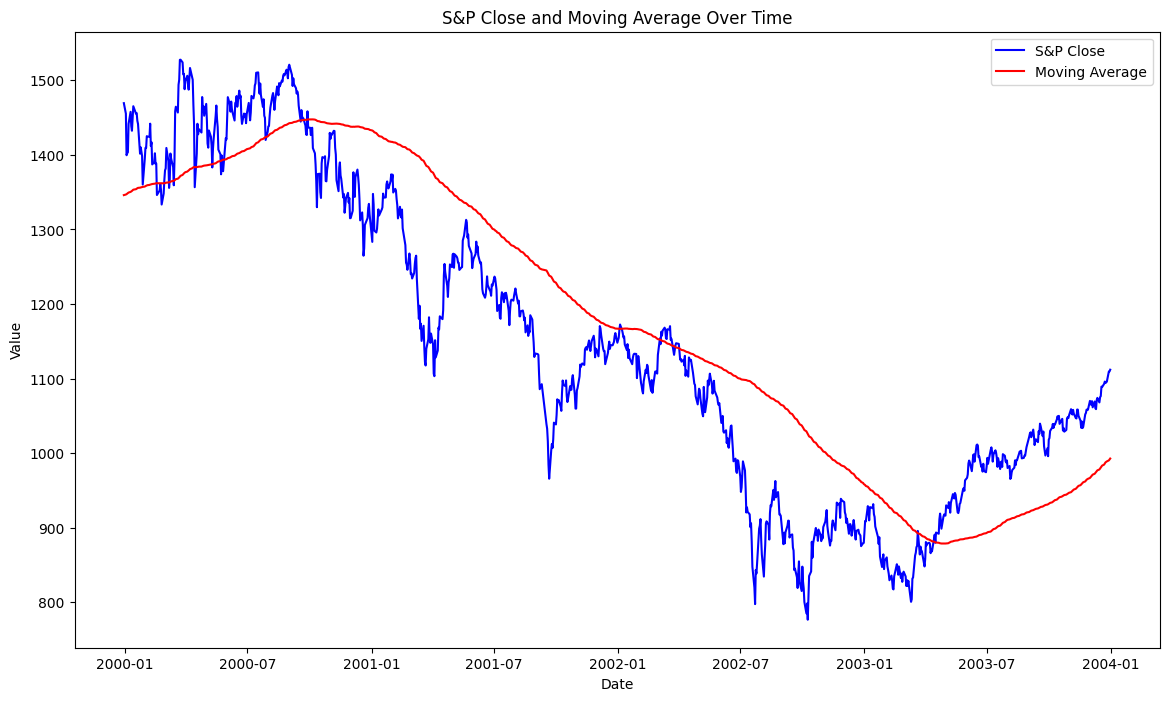

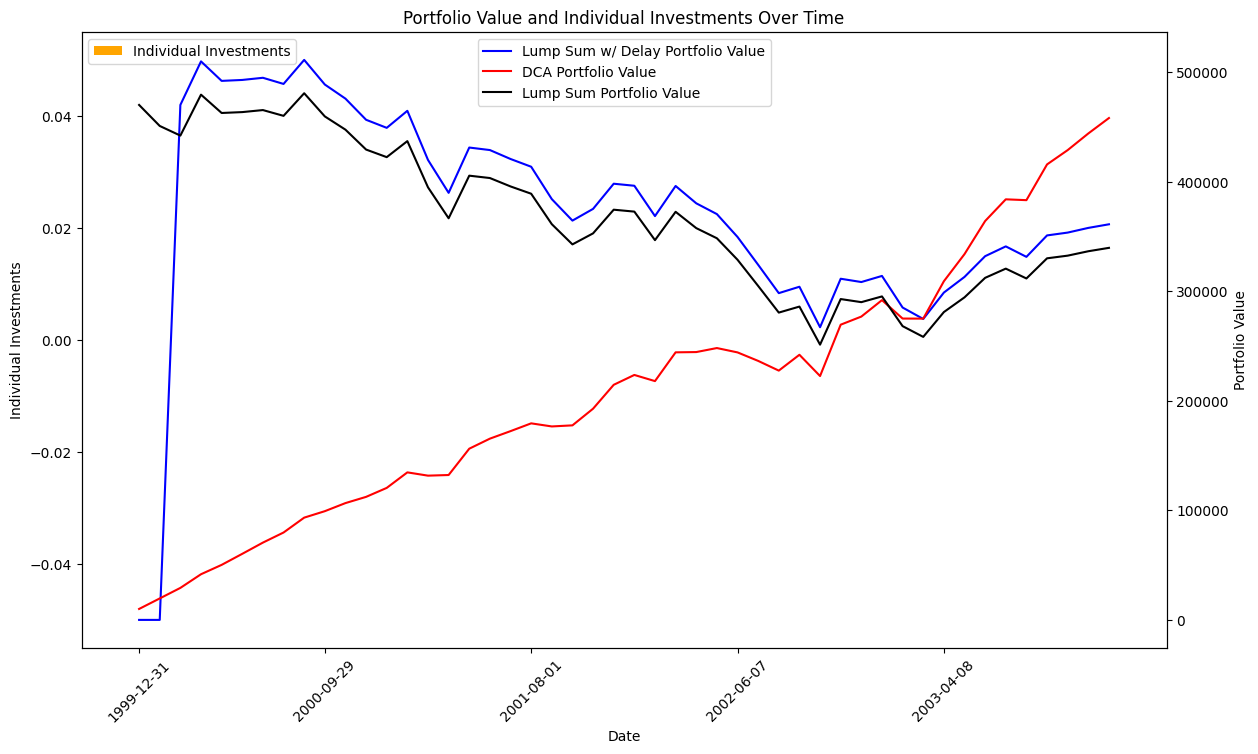

Lump Sum Result:  361064.87123232393
Original DCA Result:  458050.4344374553
Custom DCA Result:  339564.4036072826


In [116]:
#Example where DCA is better?

moving_average_window = 200
time_interval = 21
start_date = '1999-12-31'
end_date = '2004-01-01'
initial_investment = 10000
show_graph = True
slope_val = 0.001
days_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, slope_val, days_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

2018-01-31    2625.841316
2018-02-01    2629.446816
2018-02-02    2632.187014
2018-02-05    2633.711614
2018-02-06    2635.679312
                 ...     
2024-04-30    4969.892803
2024-05-01    4974.583306
2024-05-02    4979.369409
2024-05-03    4984.603608
2024-05-06    4990.186611
Name: close, Length: 1576, dtype: float64


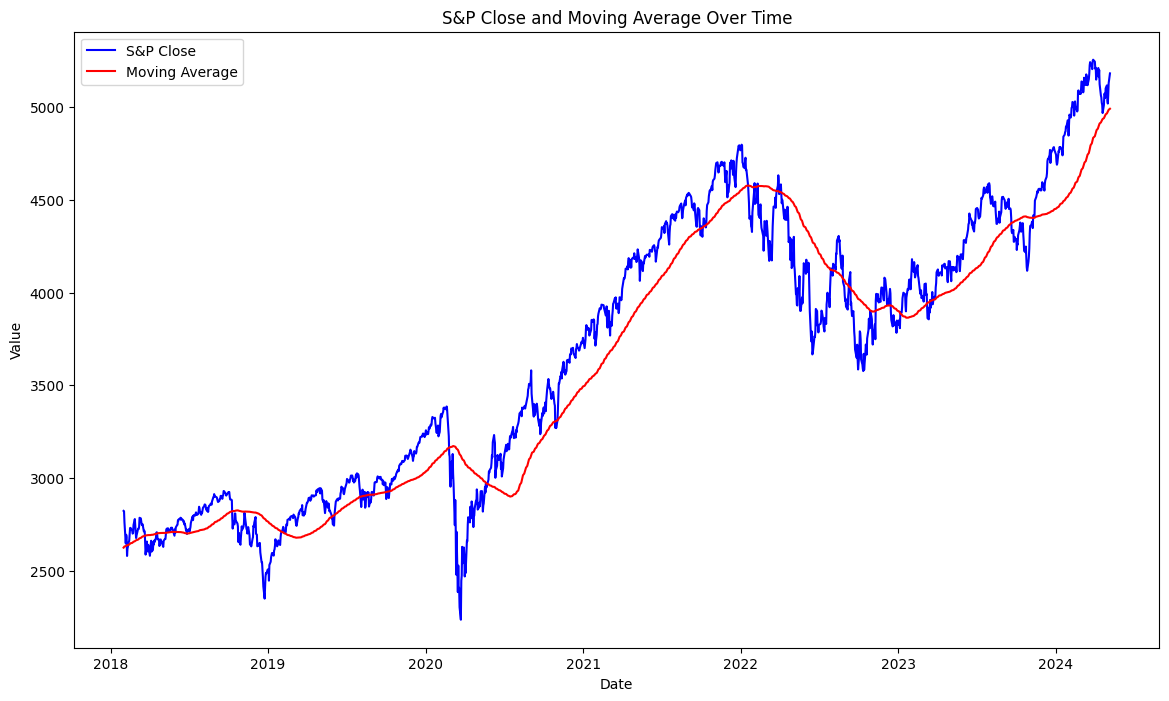

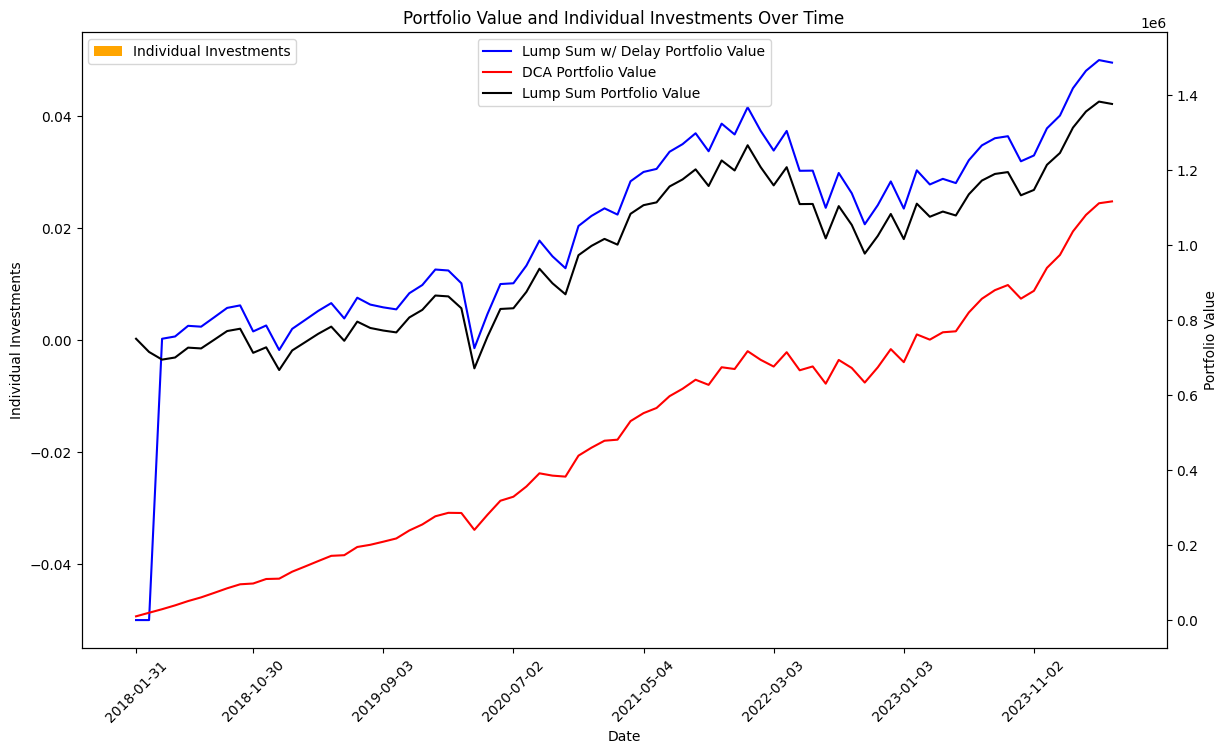

Lump Sum Result:  1486184.5697369832
Original DCA Result:  1116184.0757712128
Custom DCA Result:  1375997.3564639282


In [117]:
#Example where lump-sum at the start is better

moving_average_window = 100
time_interval = 21
start_date = '2018-01-31'
end_date = '2024-12-31'
initial_investment = 10000
show_graph = True
slope_val = 0.001
days_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, slope_val, days_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

### Bandit

In [118]:
def lump_sum_with_delay_strategy(df, initial_investment, interval, moving_averages_df, slope_val, days_val):
        initial_in = len(range(interval, len(df), interval)) * initial_investment
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        remaining_investment = 0
        lump_sum_invested = False
        ma_value_peak = moving_averages_df.iloc[0]
        total_investment = 0
        ma_slope = np.gradient(moving_averages_df)
        # print("slope: ", ma_slope)

        days = 0
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']

            if i >= len(df)-interval and not lump_sum_invested:
                shares_bought = initial_in / current_price
                shares_owned += shares_bought
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(total_investment)
                lump_sum_invested = True
                days = 0
                lumpy_date = df.index[i]
            
            if not lump_sum_invested:
                if i >= 10000 or ((ma_slope[i] > slope_val) and days >= days_val):
                    shares_bought = initial_in / current_price
                    shares_owned += shares_bought
                    current_value = shares_owned * current_price
                    portfolio_value.append(current_value)
                    dates.append(df.index[i])
                    investment_history.append(total_investment)
                    lump_sum_invested = True
                    days = 0
                    lumpy_date = df.index[i]
                else:
                    if (ma_slope[i] > 0):
                        days += 1
                    else:
                        days = 0
                    total_investment = 0
            else:
                total_investment = 0

            shares_bought = total_investment / current_price if total_investment > 0 else 0
            shares_owned += shares_bought
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(total_investment)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)



def lump_sum_strategy(df, initial_investment, interval):
        total_investment = len(range(interval, len(df), interval)) * initial_investment
        initial_price = df['close'].iloc[0]  # First available closing price at testing start
        shares_owned = total_investment / initial_price  # Total shares bought at once
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(0)  # No additional investment made

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

def dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)


In [119]:
class ContextualMultiArmedBandit:
    def __init__(self, n_arms, n_features, epsilon=0.1, decay=0.99):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.decay = decay
        self.counts = [0] * n_arms
        self.models = [LogisticRegression(max_iter=1000) for _ in range(n_arms)]
        self.data = [np.zeros((0, n_features)) for _ in range(n_arms)]
        self.targets = [[] for _ in range(n_arms)]
        self.is_fitted = [False] * n_arms  # Track whether each model is fitted

    def select_arm(self, features):
        
        if not any(self.is_fitted):
            arm = random.randint(0, self.n_arms - 1)
            print(f"Randomly chosen arm {arm} due to no fitted models")
            
        elif random.random() < self.epsilon: 
            arm = random.randint(0, self.n_arms - 1)

            print(f"Randomly chosen arm {arm} due to epsilon")
        else:
            probabilities = np.array([
                model.predict_proba([features])[0, 1] if self.is_fitted[i] else float('-inf')
                for i, model in enumerate(self.models)
            ])
            arm = np.argmax(probabilities)
            print(f"Exploited arm {arm} based on model predictions.")
        self.counts[arm] += 1
        self.epsilon *= self.decay
        return arm

    def update(self, chosen_arm, outcome, features):
        self.data[chosen_arm] = np.vstack([self.data[chosen_arm], features])
        self.targets[chosen_arm].append(outcome)
        
        # Fit the model if there are enough diverse data points
        if len(self.targets[chosen_arm]) > 1 and len(set(self.targets[chosen_arm])) > 1:
            self.models[chosen_arm].fit(self.data[chosen_arm], self.targets[chosen_arm])
            self.is_fitted[chosen_arm] = True  # Update the fit status
            print(f"model for chosen arm {chosen_arm} was fit")



def generate_features(data, start, window_size):
    min_window = min(window_size, len(data))  # Use smaller windows if not enough data
    if len(data) < min_window:
        return None  # Return None if even the minimum required data is not available

    if not isinstance(start, pd.Timestamp):
        start_date = pd.Timestamp(start)
    else:
        start_date = start
    time_index = (data.index - start_date).days

    features = pd.DataFrame(index=data.index)
    features['time_index'] = time_index
    features['close'] = data['close']
    # Use available data for moving average and volatility calculations
    features['moving_average'] = data['close'].rolling(window=min_window).mean()
    features['volatility'] = data['close'].rolling(window=min_window).std()
    features['momentum'] = data['close'].pct_change(periods=min(10, len(data)-1))  # Adjust momentum calculation too if needed
    features.dropna(inplace=True)  # Drop rows with NaN values
    return features


def dca_analysis(testing_df, moving_averages_df, initial_investment, time_interval, slope_val, days_val):
    
    lump_sum_res = lump_sum_strategy(testing_df, initial_investment, time_interval)
    dca_res = dca_strategy(testing_df, initial_investment, time_interval)
    lump_sum_with_delay_res = lump_sum_with_delay_strategy(testing_df, initial_investment, time_interval, moving_averages_df, slope_val, days_val)
    lump_sum_with_delay_value = lump_sum_with_delay_res["portfolio_value"][-1]
    dca_value = dca_res["portfolio_value"][-1]
    lump_sum_value = lump_sum_res["portfolio_value"][-1]

    return [lump_sum_with_delay_value, dca_value, lump_sum_value]


def simulate_outcome(strategy_index, df, moving_averages_df, time_interval, initial_investment, slope_val, days_val):
    
    #0 = lump sum delay
    #1 = dca
    #2 = lump sum
    results = dca_analysis(df, moving_averages_df, initial_investment, time_interval, slope_val, days_val)
    if np.argmax(results)==strategy_index:
        return 1
    else:
        return 0

def test_bandit(test_batches, test_start_date, bandit, moving_averages_df, initial_investment, slope_val, days_val, moving_average_window):
    # Results storage
    decisions = []
    successes = []

    # Loop through the test dataset
    for batch in test_batches:
        context_data = batch['data']  # Get all data up to the current date
        time_interval = (batch['end_date'] - batch['start_date']).days
        features = generate_features(context_data, test_start_date, moving_average_window)
        if features is not None and not features.empty:
            if features.shape[1] == 5:
                chosen_arm = bandit.select_arm(features.iloc[-1].values)  # Use the latest available features
                print("Chosen arm: ", chosen_arm)
                outcome = simulate_outcome(chosen_arm, context_data, moving_averages_df, time_interval, initial_investment, slope_val, days_val)
                decisions.append((batch['end_date'], chosen_arm))
                successes.append((batch['end_date'], outcome))  # Adjust based on what outcome actually returns
            else:
                print(f"Skipping date {batch['end_date']}: feature vector size mismatch")
                continue  # Skip this loop iteration if features are not available or mismatched
        else:
            continue  # Skip if features are not available
    _, outcomes = zip(*successes)
    # Calculate performance metrics
    accuracy = np.mean(outcomes)
    print(f"Accuracy of the bandit during testing: {accuracy:.2f}")

    return decisions, successes


def train_bandit(mab, training_start_date, batches, moving_averages_train, initial_investment, slope_val, days_val, moving_average_window):
    round = 0
    # Example loop to use these preprocessed and validated dates
    for batch in batches:
        print("ROUND: ", round)
        time_interval = (batch['end_date'] - batch['start_date']).days
        features_df = generate_features(batch['data'], training_start_date, moving_average_window)
        if not features_df.empty:
            features_vector = features_df.values[:-1]
            chosen_arm = mab.select_arm(features_vector)
            print("Chosen arm: ", chosen_arm)
            # print("mov avgs:\n", moving_averages_train.loc[start_date:end_date])
            outcome = simulate_outcome(chosen_arm, features_df, moving_averages_train.loc[batch['start_date']:batch['end_date']], time_interval, initial_investment, slope_val, days_val)
            mab.update(chosen_arm, outcome, features_vector)
        else:
            print("Insufficient data for generating features.")
        round+=1
    return mab

In [120]:
def plot_cumulative_rewards(decisions, rewards):
    dates, reward_values = zip(*rewards)
    unique_arms = sorted(set([arm for _, arm in decisions if arm is not None]))

    # Initialize reward tracking
    cumulative_rewards = {arm: np.zeros(len(dates)) for arm in unique_arms}
    current_rewards = {arm: 0 for arm in unique_arms}

    # Accumulate rewards by arm
    for (date, arm), (_, reward) in zip(decisions, rewards):
        if arm is not None:
            current_rewards[arm] += reward
        for a in unique_arms:
            cumulative_rewards[a][dates.index(date)] = current_rewards[a]

    names = ["Lump Sum with Delay", "DCA", "Lump Sum"]

    # Plotting
    plt.figure(figsize=(12, 8))
    for arm in unique_arms:
        plt.plot(dates, cumulative_rewards[arm], label=f'{names[arm]}')

    plt.title('Cumulative Rewards for Each Arm Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Reward')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

def plot_counts(decisions):
    # Extracting arms and dates
    dates, arms = zip(*decisions)
    unique_arms = sorted(set(arms))
    
    # Prepare data for plotting
    counts = {arm: np.zeros(len(dates)) for arm in unique_arms}
    for i, arm in enumerate(arms):
        counts[arm][i] = 1
    
    cumulative_counts = {arm: np.cumsum(counts[arm]) for arm in unique_arms}

    names = ["Lump Sum with Delay", "DCA", "Lump Sum"]

    # Plotting
    plt.figure(figsize=(12, 8))
    for arm in unique_arms:
        plt.plot(dates, cumulative_counts[arm], label=f'{names[arm]}')

    plt.title('Cumulative Decision Counts for Each Arm Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Count of Decisions')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

In [121]:
# Define parameters
moving_average = 100
training_start_date = '2010-12-31'
training_end_date = '2017-12-31'
testing_start_date = '2018-01-01'
testing_end_date = '2024-12-01'
train_years = 7
test_years = 6
moving_average_window = 20
max_val = 10
 

# Split the dataset into in-sample (training) and out-of-sample (testing)
training_df = sandp_time[training_start_date:training_end_date]
testing_df = sandp_time[testing_start_date:testing_end_date]

# Fit the curve on the training dataset
def exponential_func(x, a, b):
    return a * np.exp(b * x)

x_values_train = np.arange(len(training_df))
y_values_train = training_df['close']
initial_guess = (1.0, 0.001)
popt, pcov = curve_fit(exponential_func, x_values_train, y_values_train, p0=initial_guess)
trendline_train = exponential_func(x_values_train, *popt)

# Apply the trendline to the testing dataset
x_values_test = np.arange(len(testing_df)) + len(training_df)
trendline_test = exponential_func(x_values_test, *popt)
testing_df['Trendline'] = trendline_test

# Calculate moving averages for the testing dataset
moving_averages_test = pd.DataFrame()
full_set = sandp_time[training_start_date:testing_end_date]
moving_averages_test = full_set['close'].rolling(window=moving_average_window).mean()[len(full_set)-len(testing_df):].dropna()

moving_averages_train = pd.DataFrame()
moving_averages_train = full_set['close'].rolling(window=moving_average_window).mean()[:len(training_df)].dropna()

# Parameters
batch_size = 50
initial_investment = 10000
show_graph = False
slope_val = 0.001
days_val = 6

# Example usage within a training loop

def create_batches(dataframe, batch_size):
    batches = []
    start_index = 0
    while start_index < len(dataframe):
        end_index = start_index + batch_size
        # Ensure not to go out of bounds
        if end_index > len(dataframe):
            end_index = len(dataframe)
        batch = dataframe.iloc[start_index:end_index]
        batches.append(batch)
        start_index += batch_size


    batch_info = []
    for batch in batches:
        start_date = batch.index.min()
        end_date = batch.index.max()
        batch_info.append({
            'start_date': start_date,
            'end_date': end_date,
            'data': batch
        })

    return batch_info

# Example usage:
train_batches = create_batches(training_df, batch_size)
# print(train_batches)

mab = ContextualMultiArmedBandit(3, 5)
mab = train_bandit(mab, training_start_date, train_batches, moving_averages_train, initial_investment, slope_val, days_val, moving_average_window)


ROUND:  0
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  1
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  3
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  4
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  5
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  6
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  7
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  8
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  9
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  10
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  11
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  12
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  13
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
RO

Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 2 du

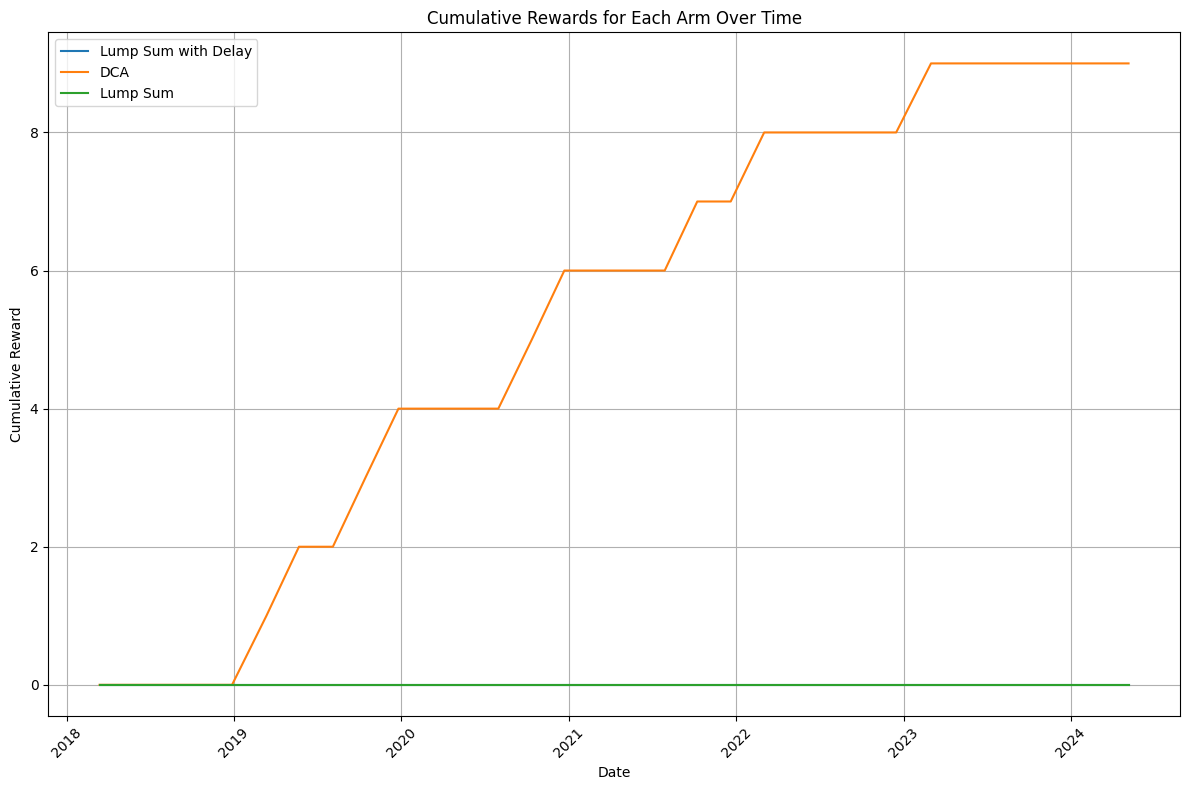

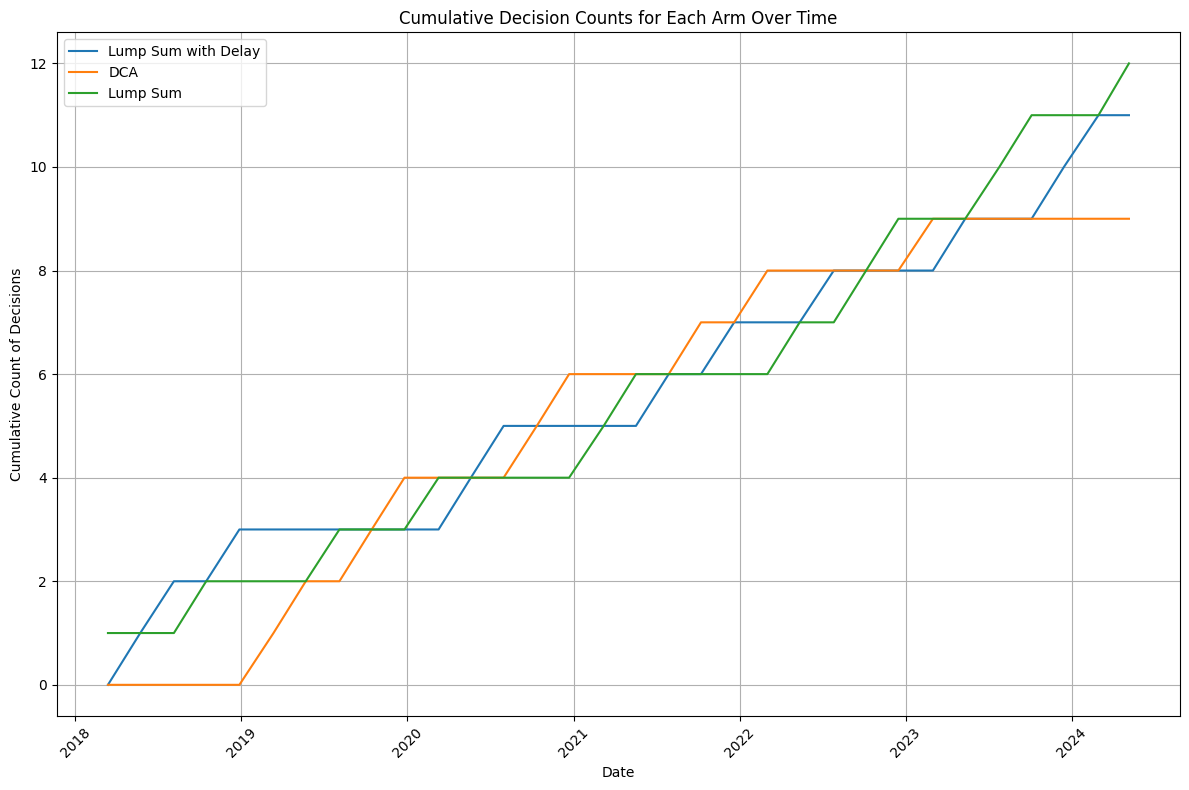

In [122]:
test_batches = create_batches(testing_df, batch_size)
decisions, successes = test_bandit(test_batches, testing_start_date, mab, moving_averages_test, initial_investment, slope_val, days_val, moving_average_window)
print("decisions:\n", decisions)
print("successes:\n", successes)
# Example usage
# decisions = [result from testing]
# rewards = [1 if success else 0 from testing outcomes]
plot_cumulative_rewards(decisions, successes)
plot_counts(decisions)

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


YOUR ANSWER HERE


Bandit portion:

- training/testing splits were conducted to ensure no data leakage occurred. Reward calculations were also done separately do avoid this same issue
- multiple tests were conducted to ensure results were in fact conclusive. 

This portion of the project worked in some capacities and didn't work in others. In the positive, the bandit was able to understand that overall, DCA was a safer method that would obtain rewards on the short term in the example data we showed above. Unfortunately, the rest of the time, the bandit was incorrect. We found that these results greatly depended on moving average windows, batch sizes/time intervals, and the training/test splits, which is unfortunate. As such, the bandit is not a feasible tool currently for determining what investment strategy will work out in the long term. In the future, we would like to try to get more predictive power by using a better timing model. We would also attempt to conduct more feature engineering, as it could be that the current features do not hold substantial predictive power. Finally, we would like to try to implement some retrospective timing capabilites, especially to try and get the best power out of the lump sum with delay strategy to try and better understand market patterns as part of the model.